# We are trying to see how COVID-19 has affected New York State and its unemployment rates. We also want to see how the stock prices for vaccine companies has changed since the pandemic has begun.

# We are trying to see the relationship by graphing them all together to find the trends that are occurring.

# The goal of this project is to not only show the effect COVID-19 has had on people, but also the economy. Based on the given dataset we are working with, we can get a good idea of how the trends are.


# Step 1: Find out COVID-19 related stats (cases and deaths in NY)

**IMPORT ALL PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# **COVID-19 STATS AND DATA**

## Load Up Data


In [ ]:
#loading up the github file with states info
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
#Choosing COVID-19 stats for NY
ny_df = df[df['state']=='New York']
ny_df

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
18142,2021-01-26,New York,36,1358964,42273
18197,2021-01-27,New York,36,1369329,42434
18252,2021-01-28,New York,36,1383112,42639
18307,2021-01-29,New York,36,1396063,42825


In [ ]:
# Total number of cases as of January 30th
ny_df['cases'].max()

1408955

# Calculate the Daily Case and Death Increases

In [ ]:
#calculating the difference with the number of cases and deaths per day
ny_df['daily cases'] = ny_df.cases.diff()
ny_df['daily deaths'] = ny_df.deaths.diff()
print(ny_df)

             date     state  fips    cases  deaths  daily cases  daily deaths
246    2020-03-01  New York    36        1       0          NaN           NaN
261    2020-03-02  New York    36        1       0          0.0           0.0
276    2020-03-03  New York    36        2       0          1.0           0.0
293    2020-03-04  New York    36       11       0          9.0           0.0
313    2020-03-05  New York    36       22       0         11.0           0.0
...           ...       ...   ...      ...     ...          ...           ...
18142  2021-01-26  New York    36  1358964   42273      11040.0         183.0
18197  2021-01-27  New York    36  1369329   42434      10365.0         161.0
18252  2021-01-28  New York    36  1383112   42639      13783.0         205.0
18307  2021-01-29  New York    36  1396063   42825      12951.0         186.0
18362  2021-01-30  New York    36  1408955   42996      12892.0         171.0

[336 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#dropping column for fips containing geographic region
nys_df=ny_df.drop(columns=['fips'], axis=1)
nys_df

,date,state,cases,deaths,daily cases,daily deaths
246,2020-03-01,New York,1,0,NaN,NaN
261,2020-03-02,New York,1,0,0.0,0.0
276,2020-03-03,New York,2,0,1.0,0.0
293,2020-03-04,New York,11,0,9.0,0.0
313,2020-03-05,New York,22,0,11.0,0.0
...,...,...,...,...,...,...
18142,2021-01-26,New York,1358964,42273,11040.0,183.0
18197,2021-01-27,New York,1369329,42434,10365.0,161.0
18252,2021-01-28,New York,1383112,42639,13783.0,205.0
18307,2021-01-29,New York,1396063,42825,12951.0,186.0


In [ ]:
#Getting the different amount of increasing cases daily- with the deletion of fips column
nys_df['daily cases'] = nys_df.cases.diff()
nys_df['daily deaths'] = nys_df.deaths.diff()
print(nys_df)

             date     state    cases  deaths  daily cases  daily deaths
246    2020-03-01  New York        1       0          NaN           NaN
261    2020-03-02  New York        1       0          0.0           0.0
276    2020-03-03  New York        2       0          1.0           0.0
293    2020-03-04  New York       11       0          9.0           0.0
313    2020-03-05  New York       22       0         11.0           0.0
...           ...       ...      ...     ...          ...           ...
18142  2021-01-26  New York  1358964   42273      11040.0         183.0
18197  2021-01-27  New York  1369329   42434      10365.0         161.0
18252  2021-01-28  New York  1383112   42639      13783.0         205.0
18307  2021-01-29  New York  1396063   42825      12951.0         186.0
18362  2021-01-30  New York  1408955   42996      12892.0         171.0

[336 rows x 6 columns]


In [ ]:
#seeing the first few cases that occurred.
nys_df.head(10)

,date,state,cases,deaths,daily cases,daily deaths
246,2020-03-01,New York,1,0,NaN,NaN
261,2020-03-02,New York,1,0,0.0,0.0
276,2020-03-03,New York,2,0,1.0,0.0
293,2020-03-04,New York,11,0,9.0,0.0
313,2020-03-05,New York,22,0,11.0,0.0
338,2020-03-06,New York,44,0,22.0,0.0
369,2020-03-07,New York,89,0,45.0,0.0
404,2020-03-08,New York,106,0,17.0,0.0
440,2020-03-09,New York,142,0,36.0,0.0
478,2020-03-10,New York,173,0,31.0,0.0


# Split the Data for Quarterly Analysis

**Spring - March to May**

In [ ]:
#Splitting based on the quarterly basis- this is for Spring
nys_springdays = nys_df[(nys_df['date'] >='2020-03-01') \
                 & (nys_df['date'] <= '2020-05-31')]
nys_springdays

,date,state,cases,deaths,daily cases,daily deaths
246,2020-03-01,New York,1,0,NaN,NaN
261,2020-03-02,New York,1,0,0.0,0.0
276,2020-03-03,New York,2,0,1.0,0.0
293,2020-03-04,New York,11,0,9.0,0.0
313,2020-03-05,New York,22,0,11.0,0.0
...,...,...,...,...,...,...
4722,2020-05-27,New York,369801,29339,1132.0,98.0
4777,2020-05-28,New York,371559,29438,1758.0,99.0
4832,2020-05-29,New York,373108,29535,1549.0,97.0
4887,2020-05-30,New York,374471,29612,1363.0,77.0


In [ ]:
#Loading up the diff function for spring
nys_springdays['daily cases'] = nys_df.cases.diff()
nys_springdays['daily deaths'] = nys_df.deaths.diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Loading up the bar graph information
nys_springfinal = nys_springdays [["date", "state", "daily cases", "daily deaths"]]

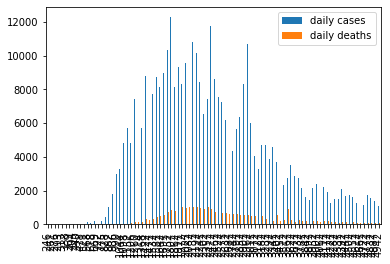

In [ ]:
nys_springfinal.plot(kind='bar')

In [ ]:
maxspring = nys_springfinal['daily cases'].max()
maxspring

#Occurs in April

12274.0

In [ ]:
#Quarterly for the summer
nys_summerdays = nys_df[(nys_df['date'] >='2020-06-01') \
                 & (nys_df['date'] <= '2020-09-01')]
nys_summerdays

,date,state,cases,deaths,daily cases,daily deaths
4997,2020-06-01,New York,376520,29766,945.0,67.0
5052,2020-06-02,New York,377881,29847,1361.0,81.0
5107,2020-06-03,New York,378924,29918,1043.0,71.0
5162,2020-06-04,New York,379977,30011,1053.0,93.0
5217,2020-06-05,New York,381019,30066,1042.0,55.0
...,...,...,...,...,...,...
9837,2020-08-28,New York,437487,32515,635.0,8.0
9892,2020-08-29,New York,438122,32522,635.0,7.0
9947,2020-08-30,New York,438831,32534,709.0,12.0
10002,2020-08-31,New York,439480,32541,649.0,7.0


In [ ]:
#Calculating different increase in cases per day
nys_summerdays['daily cases'] = nys_df.cases.diff()
nys_summerdays['daily deaths'] = nys_df.deaths.diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
nys_summerdays['daily cases'].max()

#This is on June 2nd, 2020 when the highest daily cases occurred - For the summer quarter

1361.0

In [ ]:
#preparing graph
nys_summerfinal = nys_summerdays [["date", "state", "daily cases", "daily deaths"]]

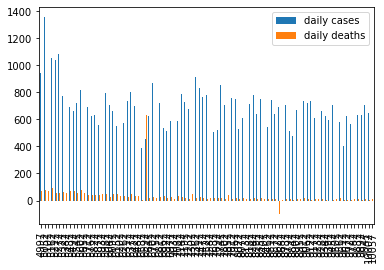

In [ ]:
#preparing the bar plot
nys_summerfinal.plot(kind='bar')

In [ ]:
#Preparing quarterly for last few months of the year
nys_winterdays = nys_df[(nys_df['date'] >='2020-09-02') \
                 & (nys_df['date'] <= '2020-12-31')]
nys_winterdays 

,date,state,cases,deaths,daily cases,daily deaths
10112,2020-09-02,New York,440947,32559,710.0,8.0
10167,2020-09-03,New York,441835,32567,888.0,8.0
10222,2020-09-04,New York,442698,32573,863.0,6.0
10277,2020-09-05,New York,443497,32579,799.0,6.0
10332,2020-09-06,New York,444226,32585,729.0,6.0
...,...,...,...,...,...,...
16492,2020-12-27,New York,928376,37000,8205.0,130.0
16547,2020-12-28,New York,938710,37118,10334.0,118.0
16602,2020-12-29,New York,950730,37256,12020.0,138.0
16657,2020-12-30,New York,963647,37412,12917.0,156.0


In [ ]:
nys_winterdays['daily cases'] = nys_df.cases.diff()
nys_winterdays['daily deaths'] = nys_df.deaths.diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nys_winterdays['daily cases'].max()

#This occurred on December 31st, 2020 - the last week of the year

15393.0

In [ ]:
nys_winterfinal = nys_winterdays [["date", "state", "daily cases", "daily deaths"]]

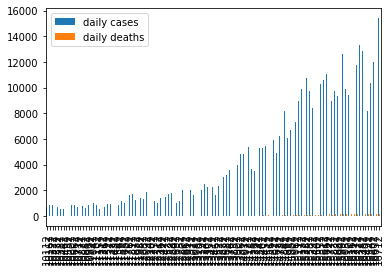

In [ ]:
#seeing how the cases began increasing towards the end of the year
nys_winterfinal.plot(kind='bar')

In [ ]:
#plotting the total cases over time
totalny_df= ny_df[["date", "state", "daily cases", "daily deaths"]]

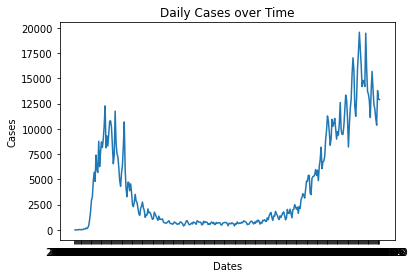

In [ ]:
#Looking at the total case fluctuation since the pandemic began
#U like pattern where the cases decreased but then increased again
x= totalny_df['date']
y= totalny_df['daily cases']

plt.plot(x,y)
plt.title('Daily Cases over Time')
plt.xlabel ('Dates')
plt.ylabel ('Cases')
plt.show()

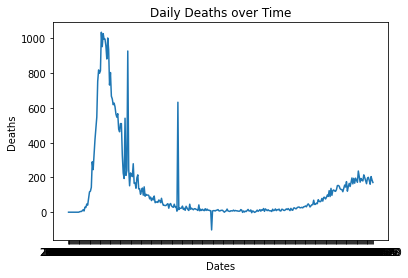

In [ ]:
#Looking at the fluctuation in deaths over time

x= totalny_df['date']
y= totalny_df['daily deaths']

plt.plot(x,y)
plt.title('Daily Deaths over Time')
plt.xlabel ('Dates')
plt.ylabel ('Deaths')
plt.show()

Based on quarterly analysis:
 - In the spring, highest number of cases were in April
 - In the summer, highest number of cases on June 2nd, 2020
 - In the winter, highest number of cases on December 31st, 2020

 The overall trend was in U-Shape. Increased in the first half, then decreased, and spiked up again to new highs in December.

 Most lives lost in early part of the pandemic. Then the highest cases were in late 2020.

# **Unemployment Rates in NY**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/hackathon/data/state_unemployment_data_1.csv')

In [ ]:
df.head()

,State,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Alabama,2.7,2.7,3.5,12.9,9.6,7.5,7.9,5.6,6.6,NaN,NaN,NaN
1,Alaska,6.0,5.8,5.6,12.9,12.7,12.4,11.6,7.4,7.2,NaN,NaN,NaN
2,Arizona,4.5,4.5,5.5,12.6,9.0,10.0,10.6,5.9,6.7,NaN,NaN,NaN
3,Arkansas,3.5,3.9,4.8,10.2,9.6,8.0,7.1,7.4,7.3,NaN,NaN,NaN
4,California,3.9,2.5,5.3,15.5,16.4,14.9,13.3,11.4,11.0,NaN,NaN,NaN


In [ ]:
df = df.set_index('State')

In [ ]:
#Need to correctly fill in the missing data for NY
df.loc['New York', 'Oct'] = 9.6
df.loc['New York', 'Nov'] = 8.4
df.loc['New York', 'Dec'] = 8.2

In [ ]:
NYdf = df.loc['New York']
NYdf

Jan       3.8
Feb       3.6
March     4.5
April    14.5
May      14.5
June     15.7
July     15.9
Aug      12.5
Sept      9.7
Oct       9.6
Nov       8.4
Dec       8.2
Name: New York, dtype: float64

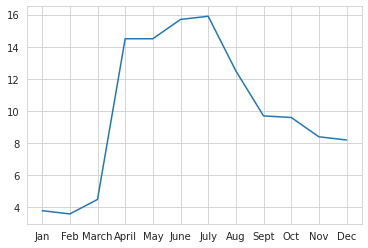

In [ ]:
plt.plot(NYdf)

Unemployment rate increased when the new COVID-19 cases increased. Especially in March, there was a big jump (~4% to 16% by July).



# **Stock Market Analysis**

We want to look at how the vaccine producing stocks have changed in value since the COVID-19 pandemic began. We specifically looked at 5 different companies: Moderna, Pfizer, BioNTech, Merck and CSL

In [ ]:
! pip install pandas_datareader

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

### Gather stock data for Moderna, Pfizer, BioNTech, Merck and CSL

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['MRNA','PFE', 'BNTX','MRK','CSLLY']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

## Moderna Analysis

In [ ]:
MRNA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,21.320000,20.049999,21.139999,20.510000,2833600,20.510000
2020-02-03,21.059999,19.700001,20.660000,20.379999,3155400,20.379999
2020-02-04,20.879999,19.750000,20.090000,20.870001,1824400,20.870001
2020-02-05,21.200001,19.670000,20.990000,20.049999,2656800,20.049999
2020-02-06,20.320000,19.700001,20.270000,19.879999,1929700,19.879999


In [ ]:
MRNA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,147.429993,137.250000,138.399994,147.000000,26970900,147.000000
2021-01-26,154.550003,145.000000,145.149994,151.929993,16964700,151.929993
2021-01-27,164.550003,149.000000,151.199997,155.729996,20262900,155.729996
2021-01-28,168.000000,153.619995,154.104996,159.550003,16497400,159.550003
2021-01-29,185.979996,166.199997,174.990005,173.160004,39518300,173.160004


In [ ]:
PFE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,35.531307,35.009487,35.047440,35.332069,33894005.0,33.923119
2020-02-03,36.091084,35.388992,35.540798,35.588234,20875735.0,34.169064
2020-02-04,36.280834,35.702087,36.129032,35.759014,31150865.0,34.333035
2020-02-05,36.593929,35.882355,35.910816,36.214420,29443490.0,34.770283
2020-02-06,36.527515,36.081593,36.470589,36.299809,21047748.0,34.852268


In [ ]:
PFE.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,37.290001,36.320000,36.549999,37.279999,31728500.0,36.878807
2021-01-26,37.599998,37.160000,37.270000,37.310001,27718700.0,36.908485
2021-01-27,37.040001,36.169998,36.990002,36.240002,50561200.0,35.850002
2021-01-28,36.330002,35.840000,35.950001,35.860001,39466700.0,35.860001
2021-01-29,36.880001,35.619999,36.880001,35.900002,60026600.0,35.900002


In [ ]:
BNTX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,30.950001,28.500000,30.360001,29.209999,138700,29.209999
2020-02-03,30.690001,28.780001,29.799999,30.270000,177600,30.270000
2020-02-04,32.919998,29.170000,29.170000,32.919998,137600,32.919998
2020-02-05,34.000000,28.690001,34.000000,29.250000,405000,29.250000
2020-02-06,32.930000,29.680000,32.000000,32.930000,387400,32.930000


In [ ]:
BNTX.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,110.980003,105.139999,108.000000,110.610001,2882600,110.610001
2021-01-26,112.832001,105.489998,110.279999,106.290001,3863900,106.290001
2021-01-27,110.863998,103.019997,105.150002,105.970001,2139600,105.970001
2021-01-28,111.239998,106.599998,107.662003,110.000000,2296600,110.000000
2021-01-29,118.169998,111.400002,114.940002,116.940002,6617100,116.940002


In [ ]:
MRK.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,86.669998,85.000000,86.379997,85.440002,9180900.0,82.810669
2020-02-03,88.220001,86.040001,86.040001,87.339996,9286100.0,84.652199
2020-02-04,89.199997,88.059998,88.430000,88.360001,14400100.0,85.640816
2020-02-05,86.739998,84.000000,84.680000,85.830002,27948600.0,83.188675
2020-02-06,86.230003,85.260002,86.019997,85.680000,15372300.0,83.043289


In [ ]:
MRK.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,81.190002,80.059998,80.709999,81.150002,9501600.0,81.150002
2021-01-26,81.150002,80.129997,81.150002,80.250000,7393400.0,80.250000
2021-01-27,80.070000,76.839996,79.860001,77.070000,15487000.0,77.070000
2021-01-28,78.510002,77.070000,77.080002,77.919998,12377900.0,77.919998
2021-01-29,78.370003,76.389999,77.989998,77.070000,10173300.0,77.070000


In [ ]:
CSLLY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,104.540001,102.970001,104.540001,102.970001,76500.0,101.920731
2020-02-03,104.879997,104.239998,104.379997,104.760002,45500.0,103.692490
2020-02-04,107.690002,105.889999,107.690002,106.860001,75400.0,105.771088
2020-02-05,107.669998,106.320000,106.320000,107.269997,34200.0,106.176910
2020-02-06,108.730003,108.089996,108.730003,108.330002,46400.0,107.226112


In [ ]:
CSLLY.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,106.760002,105.730003,105.730003,106.760002,58200.0,106.760002
2021-01-26,107.250000,105.529999,107.250000,106.150002,59900.0,106.150002
2021-01-27,106.180000,103.199997,104.949997,103.919998,98700.0,103.919998
2021-01-28,103.930000,101.849998,102.599998,103.540001,65300.0,103.540001
2021-01-29,105.970001,102.860001,102.860001,104.059998,56900.0,104.059998


Companies that got their vaccines approved.

Trading volume

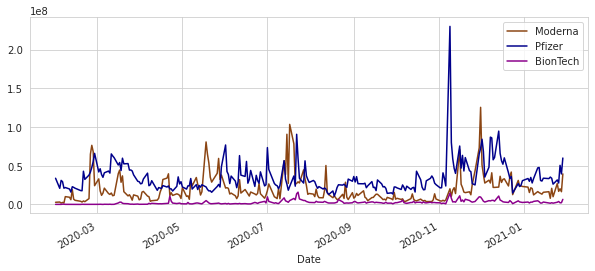

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past year
MRNA['Volume'].plot(legend=True,figsize=(10,4), color='saddlebrown', label='Moderna')

# Now let's plot the total volume of stock being traded each day over the past year
PFE['Volume'].plot(legend=True,figsize=(10,4), color='darkblue', label='Pfizer')

# Now let's plot the total volume of stock being traded each day over the past year
BNTX['Volume'].plot(legend=True,figsize=(10,4),color='darkmagenta', label= 'BionTech')

Companies that didn't get their vaccines out.

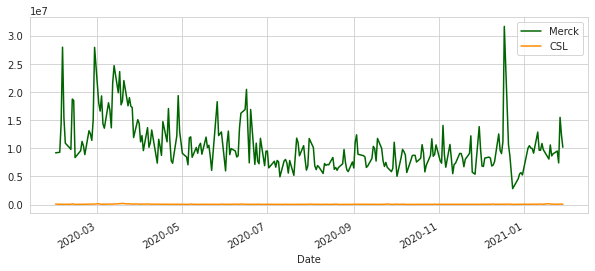

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past year
MRK['Volume'].plot(legend=True,figsize=(10,4), color='darkgreen', label='Merck')

# Now let's plot the total volume of stock being traded each day over the past year
CSLLY['Volume'].plot(legend=True,figsize=(10,4), color='darkorange', label='CSL')

## Stock Prices


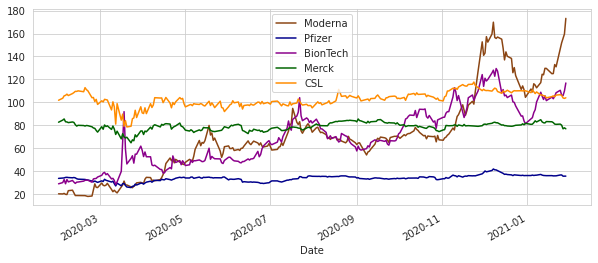

In [ ]:
# Let's see a historical view of the closing price
MRNA['Adj Close'].plot(legend=True,figsize=(10,4), color='saddlebrown', label='Moderna')

# Let's see a historical view of the closing price
PFE['Adj Close'].plot(legend=True,figsize=(10,4), color='darkblue', label='Pfizer')

# Let's see a historical view of the closing price
BNTX['Adj Close'].plot(legend=True,figsize=(10,4),color='darkmagenta', label='BionTech')

# Let's see a historical view of the closing price
MRK['Adj Close'].plot(legend=True,figsize=(10,4), color='darkgreen', label='Merck')

# Let's see a historical view of the closing price
CSLLY['Adj Close'].plot(legend=True,figsize=(10,4), color='darkorange', label='CSL')

BioNTech and Moderna had a slight decrease when the new COVID variants were found.

Daily return percentage

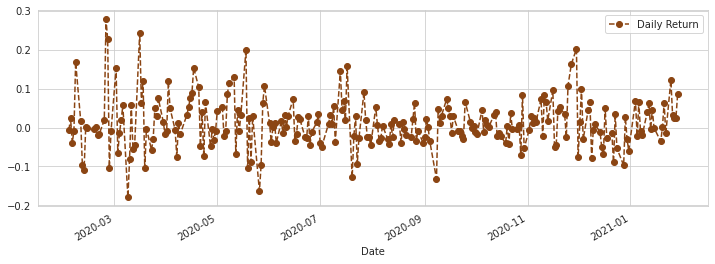

In [ ]:
# We'll use pct_change to find the percent change for each day
MRNA['Daily Return'] = MRNA['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MRNA['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', color='saddlebrown')

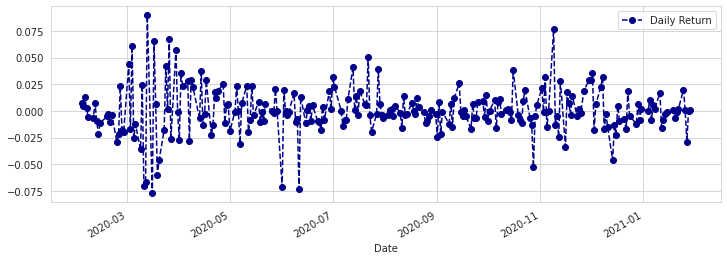

In [ ]:
# We'll use pct_change to find the percent change for each day
PFE['Daily Return'] = PFE['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
PFE['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', color='darkblue')

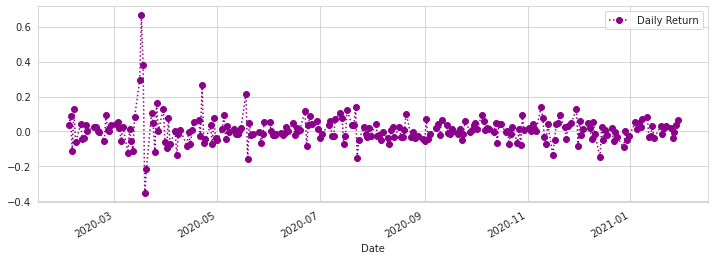

In [ ]:
# We'll use pct_change to find the percent change for each day
BNTX['Daily Return'] = BNTX['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
BNTX['Daily Return'].plot(figsize=(12,4),legend=True,linestyle=':',marker='o',color='darkmagenta')

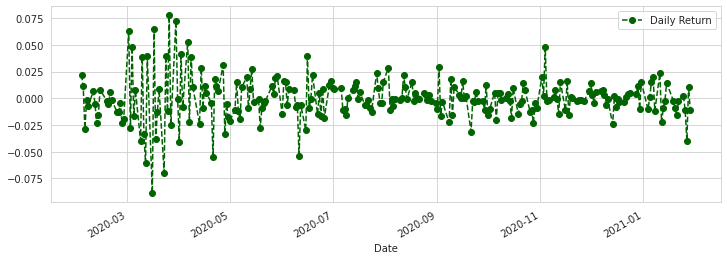

In [ ]:
# We'll use pct_change to find the percent change for each day
MRK['Daily Return'] = MRK['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MRK['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', color='darkgreen')

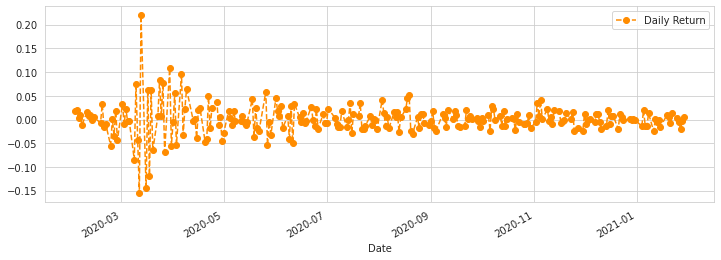

In [ ]:
# We'll use pct_change to find the percent change for each day
CSLLY['Daily Return'] = CSLLY['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
CSLLY['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', color='darkorange')

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

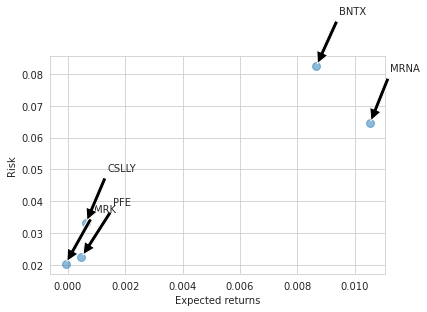

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

---------------------------------------------------------


(0.0, 400.0, 0.0, 2000.0)

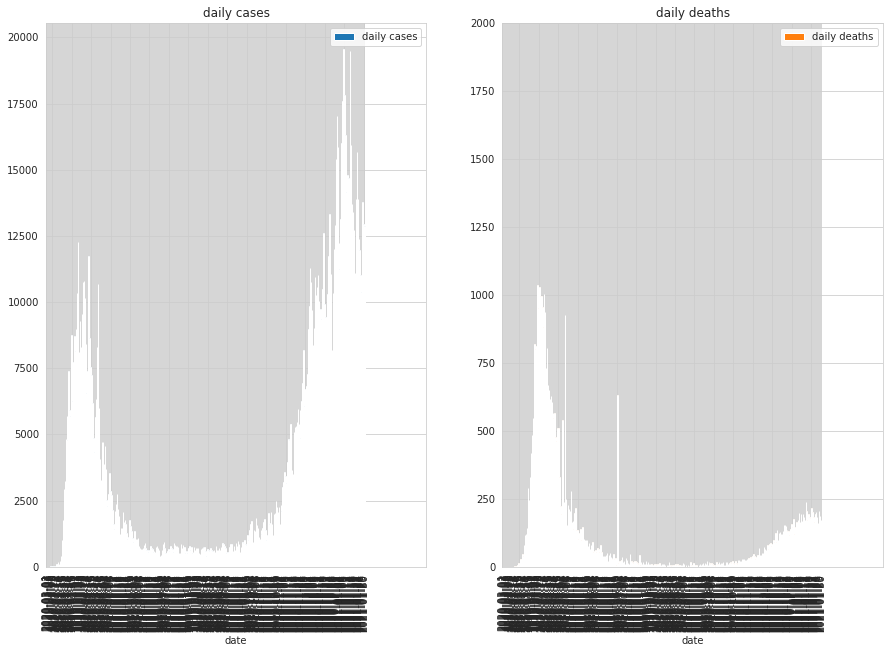

In [ ]:
totalny_df.plot.bar(y=['daily cases','daily deaths'], x='date', subplots=True, layout=(1,2), figsize=(15,10))
plt.axis([0, 400, 0, 2000])

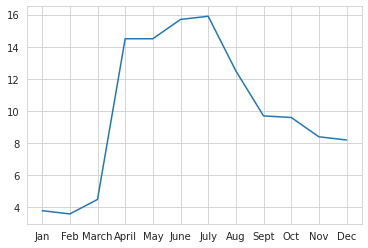

In [ ]:
plt.plot(NYdf)

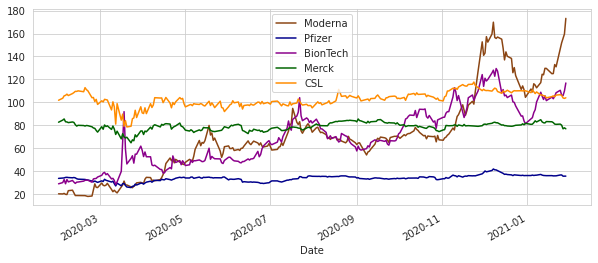

In [ ]:
MRNA['Adj Close'].plot(legend=True,figsize=(10,4), color='saddlebrown', label='Moderna')

PFE['Adj Close'].plot(legend=True,figsize=(10,4), color='darkblue', label='Pfizer')

BNTX['Adj Close'].plot(legend=True,figsize=(10,4),color='darkmagenta', label='BionTech')

MRK['Adj Close'].plot(legend=True,figsize=(10,4), color='darkgreen', label='Merck')

CSLLY['Adj Close'].plot(legend=True,figsize=(10,4), color='darkorange', label= 'CSL')

# FINAL ANALYSIS:

### Cases were increasing in March, continued to increase until June. Most deaths were recorded in the first quarter of the pandemic. Most cases were recorded in late December. Deaths probably reduced because there is better technology and understanding of disease to control it.

### NY unemployment rates reached a peak in April and May. Since then, the unemployment rates have decreased, yet aren't as low as they were in January and February. The recovery may be associated with the slow  reopening of businesses.

### Stocks related to vaccine-producing companies were slowly increasing, until there was a big jump in November, especially with the Moderna and the BionTech stocks. BionTech produced the vaccine and investors were in favor of the stock to increase. Pfizer was leading in mass production and distribution.



Companies with Vaccine Trials:

Moderna Percentage Change: 744.27%

Pfizer: 1.61%

BioNTech: 300.34%


Companies who abandoned vaccine trials:

Merck: -9.80% (decrease)

CSL: 1.06%